In [66]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
df = pd.read_csv('https://storage.googleapis.com/the_public_bucket/wine-clustering.csv')

## ¿Qué sucederá si no estandarizamos los datos?

### Aplicamos clusterización

### Aplicamos el método del codo y silhouette_score para identificar el número adecuado de k

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

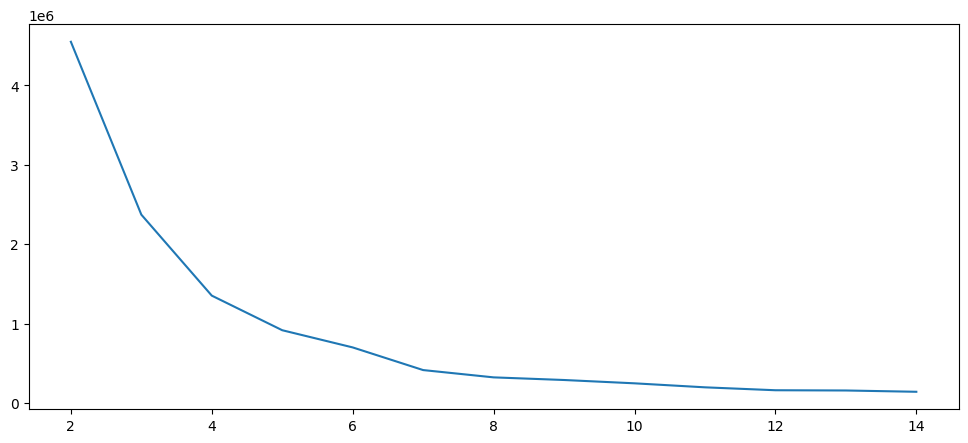

In [23]:
SSD = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    SSD.append(km.inertia_)
plt.figure(figsize=(12,5))
plt.plot(K,SSD)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()


El gráfico nos dice que el ideal debería ser 4 

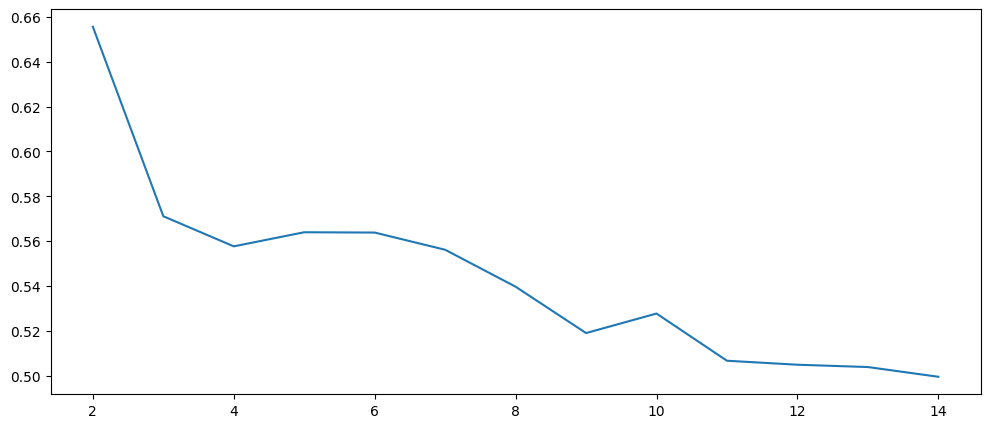

In [24]:
silhouette_scores= []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    y = km.predict(df)
    silhouette_scores.append(silhouette_score(df,y))
plt.figure(figsize=(12,5))
plt.plot(K,silhouette_scores)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

El gráfico nos dice que el score más alto es el 2 y luego el 3

### Al parecer el **Silhouette Score** es diferente al resultado del **Elbow**

:(

## ¡¡Ahora intentemos con estandarización!!

In [34]:
from sklearn.preprocessing import StandardScaler

In [33]:
df.var()

Alcohol                    0.659
Malic_Acid                 1.248
Ash                        0.075
Ash_Alcanity              11.153
Magnesium                203.989
Total_Phenols              0.392
Flavanoids                 0.998
Nonflavanoid_Phenols       0.015
Proanthocyanins            0.328
Color_Intensity            5.374
Hue                        0.052
OD280                      0.504
Proline                99166.717
dtype: float64

hay variables que tiene varianzas muy diferentes, es necesario escalar las variables porque sino todas estarían influenciadas por el Proline que tiene una varianza demasiado alta

In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.describe()

Alcohol  Malic_Acid     Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
count  178.000     178.000 178.000       178.000    178.000        178.000   
mean    -0.000      -0.000  -0.000        -0.000     -0.000          0.000   
std      1.003       1.003   1.003         1.003      1.003          1.003   
min     -2.434      -1.433  -3.679        -2.671     -2.088         -2.107   
25%     -0.788      -0.659  -0.572        -0.689     -0.824         -0.885   
50%      0.061      -0.423  -0.024         0.002     -0.122          0.096   
75%      0.836       0.670   0.698         0.602      0.510          0.809   
max      2.260       3.109   3.156         3.155      4.371          2.540   

       Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count     178.000               178.000          178.000          178.000   
mean       -0.000                 0.000           -0.000            0.000   
std         1.003                 1.003            1.003            1.003   
min        -1.696                -1.868           -2.069           -1.634   
25%        -0.828                -0.740           -0.597           -0.795   
50%         0.106                -0.176           -0.063           -0.159   
75%         0.849                 0.610            0.629            0.494   
max         3.063                 2.402            3.485            3.435   

          Hue   OD280  Proline  
count 178.000 178.000  178.000  
mean    0.000   0.000   -0.000  
std     1.003   1.003    1.003  
min    -2.095  -1.895   -1.493  
25%    -0.768  -0.952   -0.785  
50%     0.033   0.238   -0.234  
75%     0.713   0.789    0.758  
max     3.302   1.961    2.971

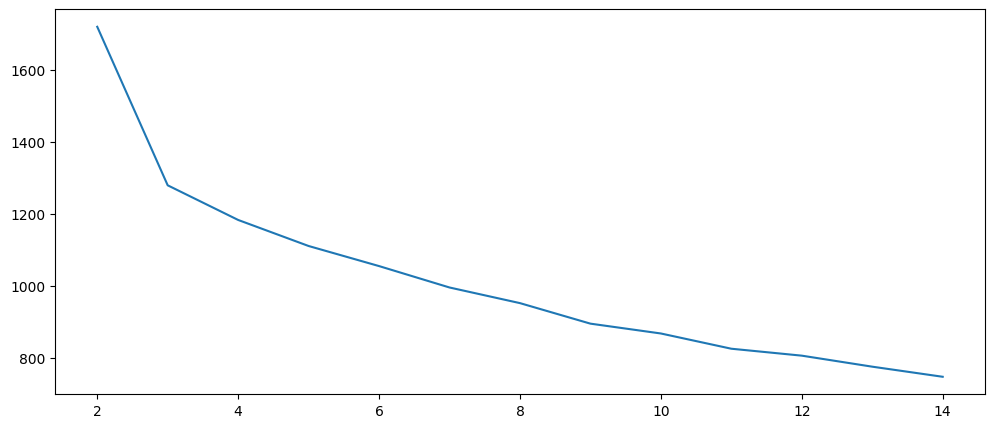

In [42]:
SSD = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,random_state=3,n_init=20)
    km = km.fit(scaled_data)
    SSD.append(km.inertia_)
plt.figure(figsize=(12,5))
plt.plot(K,SSD)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

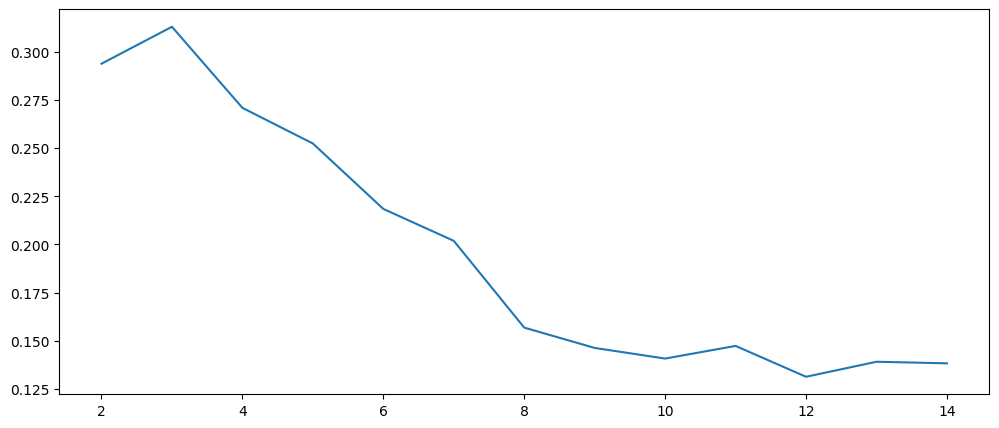

In [38]:
silhouette_scores= []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,random_state=3,n_init=20)
    km = km.fit(scaled_data)
    y = km.predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data,y))
plt.figure(figsize=(12,5))
plt.plot(K,silhouette_scores)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

Aplicamos random_state para el cluster sea reproducible y n_init=20 para obtener el óptimo centroide 

## ¡¡Ahora sí nos cuadra ambos metodos!!

### 👉El número ideal de clusters es 3

In [77]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
kmeans.fit_predict(scaled_data)
#scaled_data['cluster'] = kmeans.labels_
#scaled_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [76]:
del scaled_data['cluster']

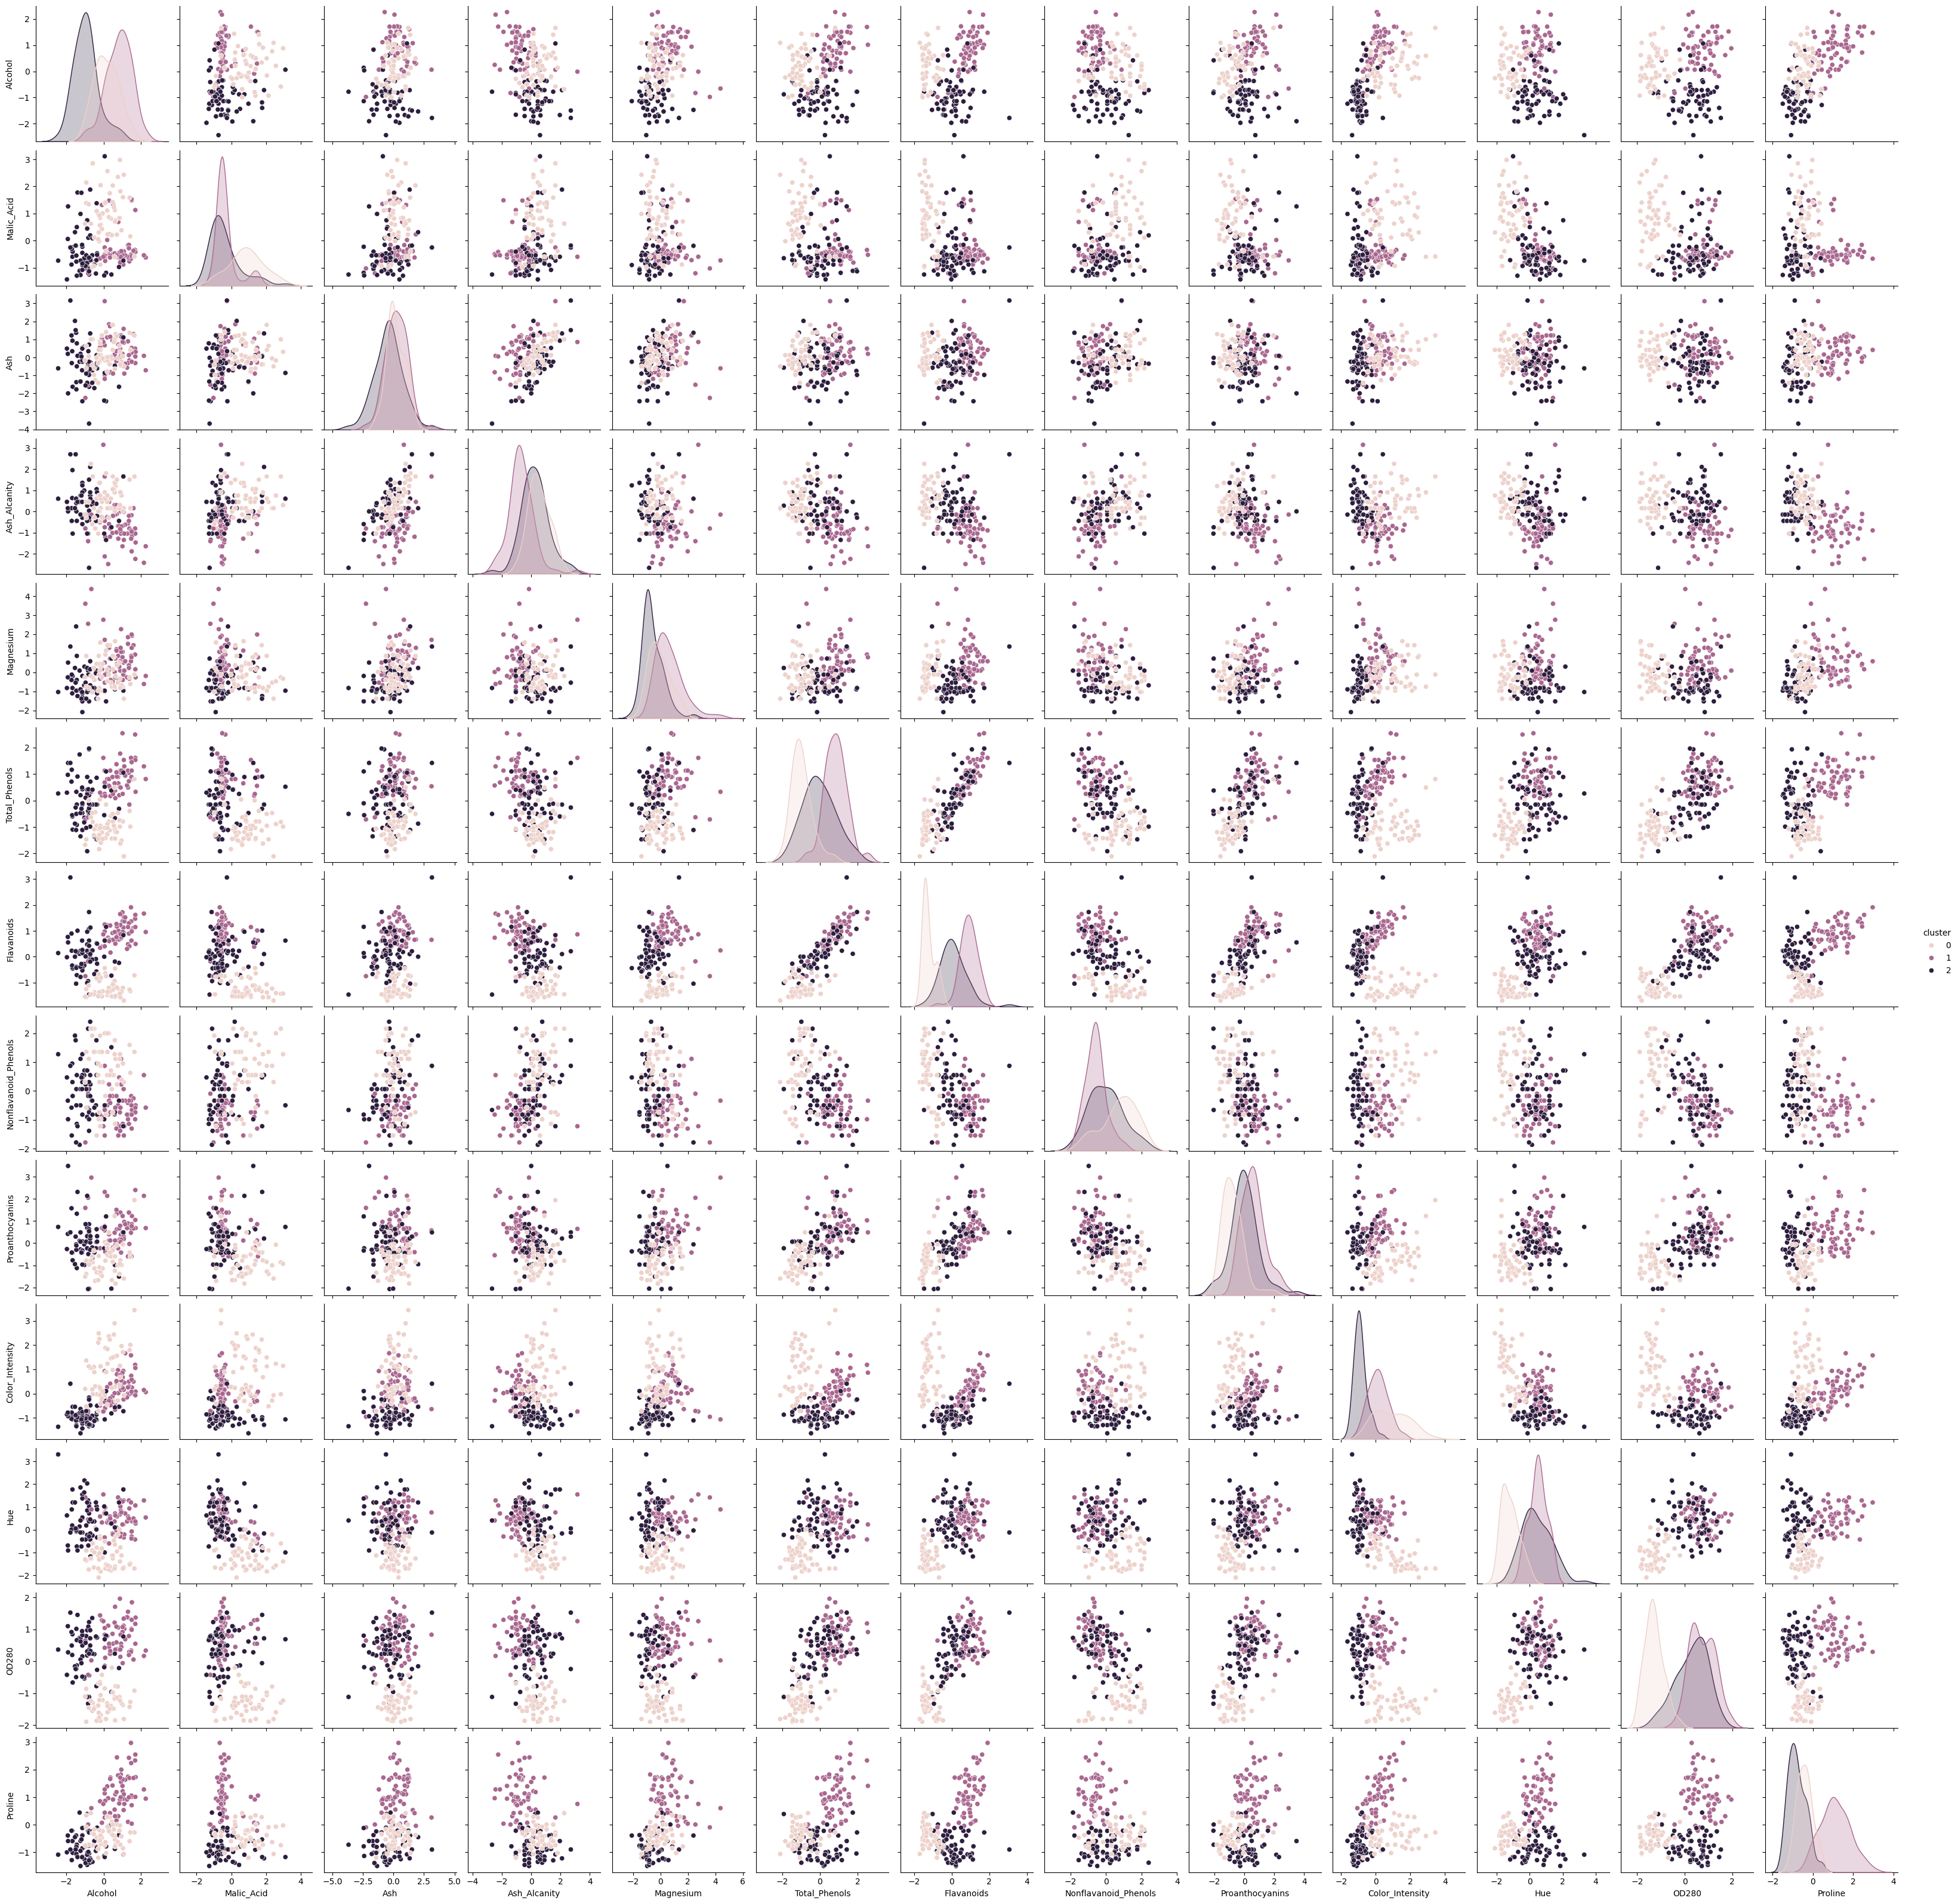

In [36]:
sns.pairplot(scaled_data,hue='cluster')

# Pero, ¿Podemos mejorarlo y hacerlo más divertido?

## Por supuesto, utilicemos **PCA**

PCA nos ayuda a reducir la dimensionalidad de nuestros datos, lo cual nos ayuda muchísimo con el aprendizaje no supervisado. En este caso, al tener 13 atributos, visualizar la información es un poco confusa. PCA nos ayudará a reducir la dimensionalidad de nuestro dataset

In [ ]:
from sklearn.decomposition import PCA

Es importante que para utilizar PCA, utilicemos antes la estandarización de los datos

In [56]:
del scaled_data['cluster']

In [58]:
pca = PCA()
pca.fit(scaled_data)
pca_data_scaled = pca.transform(scaled_data)
pca_data_scaled

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [59]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

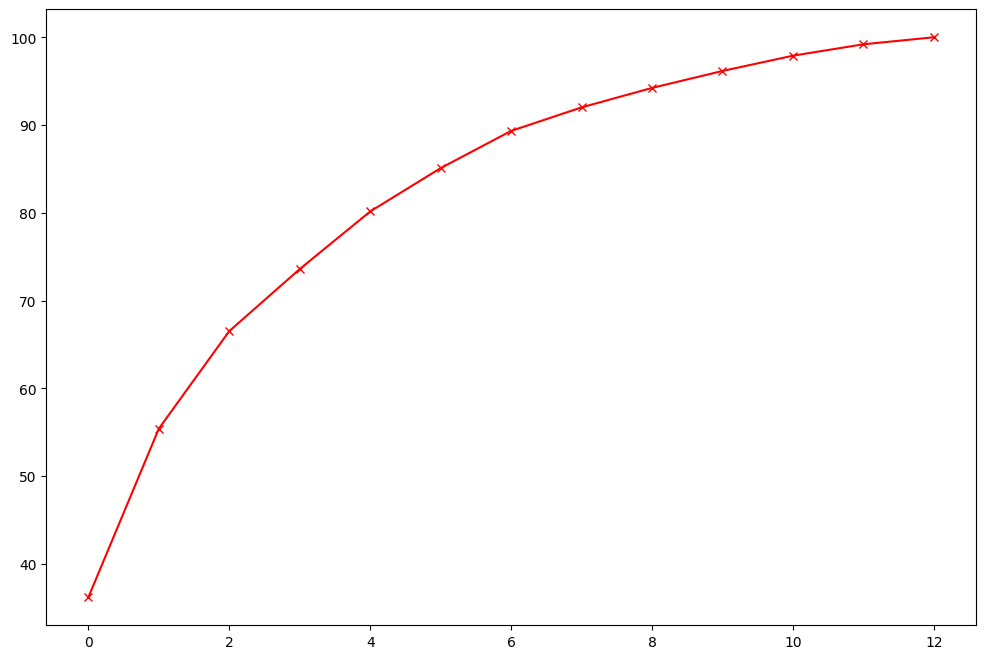

In [60]:
cum_var = np.cumsum(np.round(var,decimals=4)*100)
plt.figure(figsize=(12,8))
plt.plot(cum_var,'r-x')
plt.show()

Como se puede apreciar en la figura, con 6 dimensiones podemos explicar casi el 90% de la varianza de los datos. Eso significa que hemos logrado reducir casi la mitad de los atributos con esta técnica

In [64]:
pca_data = pd.DataFrame(pca_data_scaled)
pca_data.drop([6,7,8,9,10,11,12],axis=1,inplace=True)

In [65]:
pca_data

0      1      2      3      4      5
0    3.317 -1.443 -0.166 -0.216  0.693 -0.224
1    2.209  0.333 -2.026 -0.291 -0.258 -0.927
2    2.517 -1.031  0.983  0.725 -0.251  0.549
3    3.757 -2.756 -0.176  0.568 -0.312  0.114
4    1.009 -0.870  2.027 -0.410  0.298 -0.407
..     ...    ...    ...    ...    ...    ...
173 -3.371 -2.216 -0.343  1.059 -0.574 -1.109
174 -2.602 -1.757  0.208  0.349  0.255 -0.026
175 -2.678 -2.761 -0.941  0.312  1.271  0.273
176 -2.387 -2.297 -0.551 -0.688  0.814  1.179
177 -3.209 -2.769  1.014  0.597 -0.895  0.296

[178 rows x 6 columns]